In [67]:
import pandas as pd
import numpy as np
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv('approval_rating.csv')



In [69]:
display(df)



,Date,State,replublican_Approval_rating,democratic_approval_rating,Result
0,2020,AL,0.569,0.396,R
1,2020,AK,0.529,0.445,R
2,2020,AZ,0.481,0.507,D
3,2020,AR,0.605,0.378,R
4,2020,CA,0.341,0.641,D
...,...,...,...,...,...
301,2000,VA,0.525,0.445,R
302,2000,WA,0.446,0.502,D
303,2000,WV,0.519,0.456,R
304,2000,WI,0.520,0.479,D


In [70]:
df.columns = ['year', 'state','republican_approval_ratings', 'democratic_approval_ratings','result']




In [71]:
display(df)





,year,state,republican_approval_ratings,democratic_approval_ratings,result
0,2020,AL,0.569,0.396,R
1,2020,AK,0.529,0.445,R
2,2020,AZ,0.481,0.507,D
3,2020,AR,0.605,0.378,R
4,2020,CA,0.341,0.641,D
...,...,...,...,...,...
301,2000,VA,0.525,0.445,R
302,2000,WA,0.446,0.502,D
303,2000,WV,0.519,0.456,R
304,2000,WI,0.520,0.479,D


In [72]:
## Convert to date format

##df['year'] = pd.to_datetime(df['year'], format='%Y')




In [73]:
## convert  categorical variable into numeri values 
df['won'] = 1*(df['result']=='D')


In [74]:
display(df)

,year,state,republican_approval_ratings,democratic_approval_ratings,result,won
0,2020,AL,0.569,0.396,R,0
1,2020,AK,0.529,0.445,R,0
2,2020,AZ,0.481,0.507,D,1
3,2020,AR,0.605,0.378,R,0
4,2020,CA,0.341,0.641,D,1
...,...,...,...,...,...,...
301,2000,VA,0.525,0.445,R,0
302,2000,WA,0.446,0.502,D,1
303,2000,WV,0.519,0.456,R,0
304,2000,WI,0.520,0.479,D,1


In [75]:
## check correlation..

df_cor = df[['republican_approval_ratings','democratic_approval_ratings','won']]

df_cor.corr()



,republican_approval_ratings,democratic_approval_ratings,won
republican_approval_ratings,1.000000,-0.849138,-0.705196
democratic_approval_ratings,-0.849138,1.000000,0.725134
won,-0.705196,0.725134,1.000000


Text(0.5, 1.0, 'Election Result VS Republican Approval Ratings')

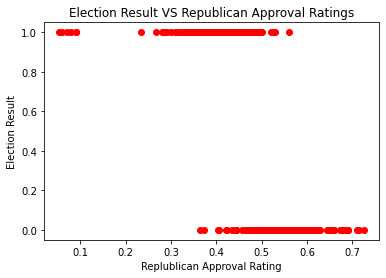

In [76]:
## Scatter Plots
plt.scatter(df['republican_approval_ratings'],df['won'], color='red')

# Add axis labels for clarity (x : TV budget, y : Sales)
plt.xlabel("Replublican Approval Rating")
plt.ylabel("Election Result")
plt.title('Election Result VS Republican Approval Ratings')

Text(0.5, 1.0, 'Election Result VS Democratic Approval Ratings')

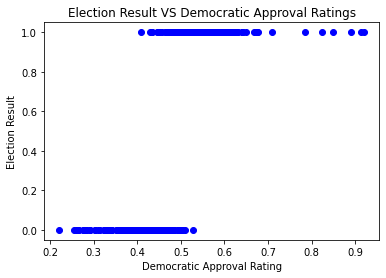

In [77]:
## Scatter Plots
plt.scatter(df['democratic_approval_ratings'],df['won'], color='blue')

# Add axis labels for clarity (x : TV budget, y : Sales)
plt.xlabel("Democratic Approval Rating")
plt.ylabel("Election Result")
plt.title('Election Result VS Democratic Approval Ratings')

<AxesSubplot:xlabel='state', ylabel='republican_approval_ratings'>

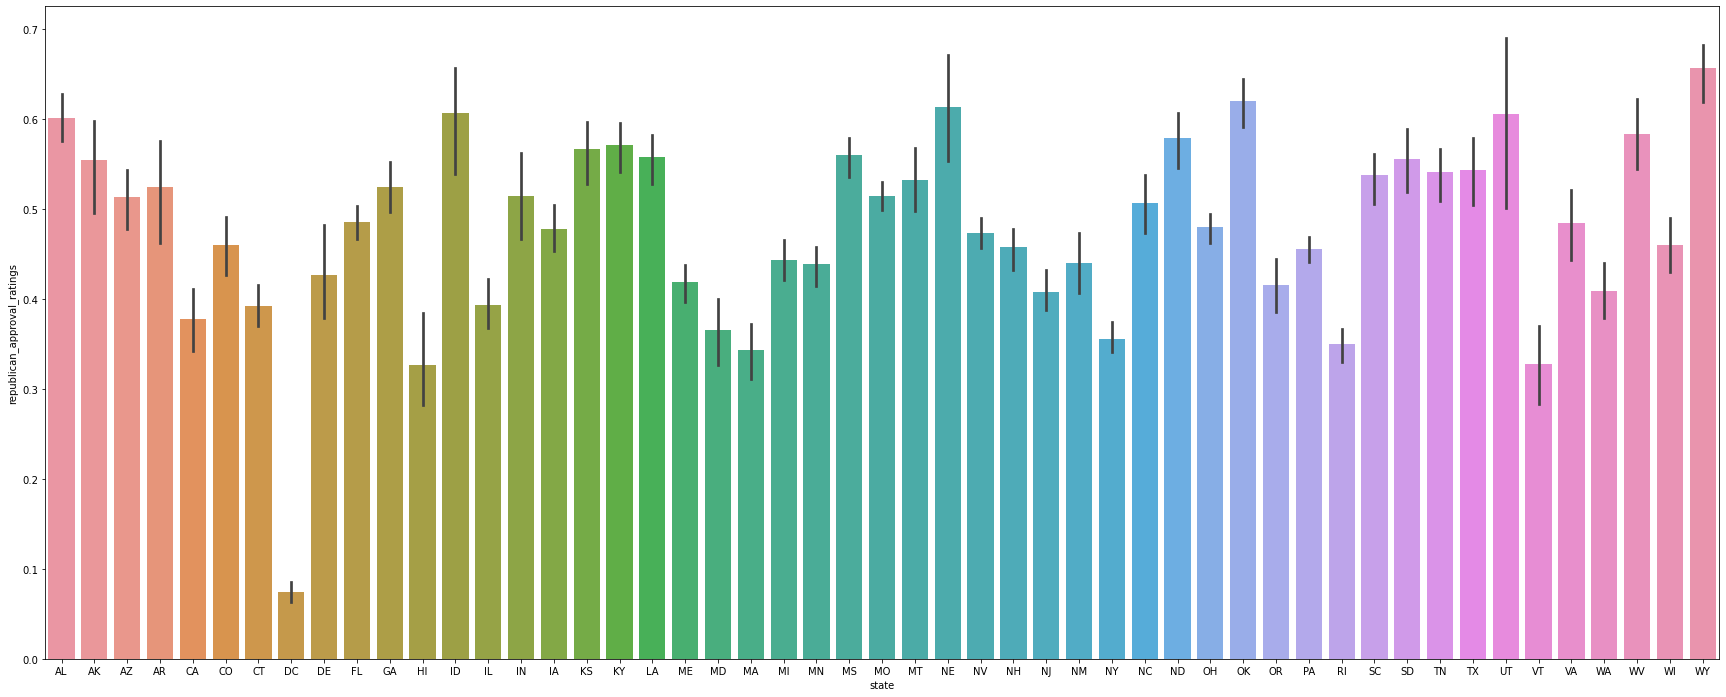

In [78]:
f, ax = plt.subplots(1,1, figsize=(30, 12))
ax.set_ylabel("Republican Approval Ratings")
sns.barplot(x="state", y="republican_approval_ratings", data=df, estimator=np.mean, ax=ax)



<AxesSubplot:xlabel='state', ylabel='democratic_approval_ratings'>

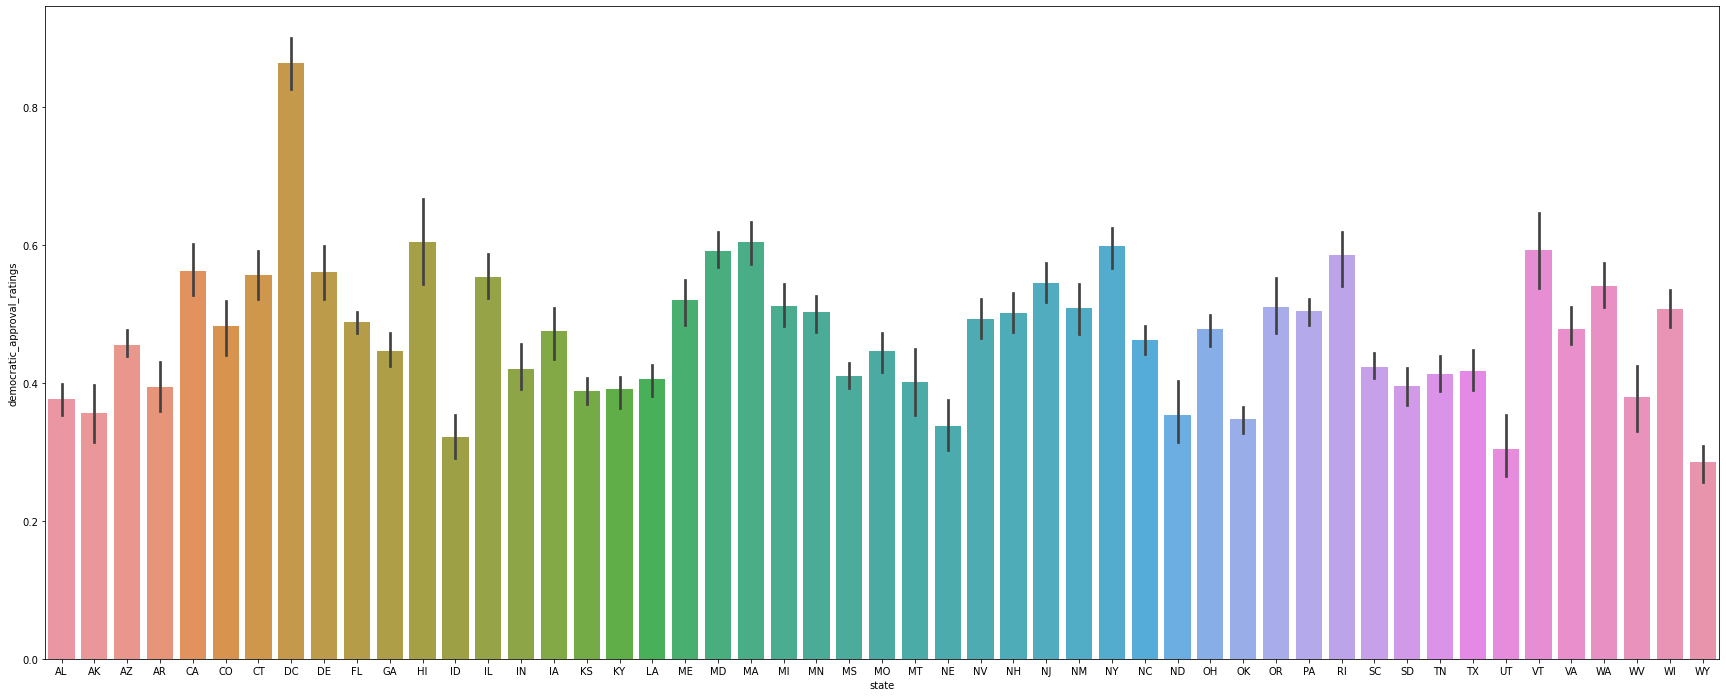

In [79]:
f, ax = plt.subplots(1,1, figsize=(30, 12))
sns.barplot(x="state", y="democratic_approval_ratings", data=df, estimator=np.mean, ax=ax)

,State,Approvals,appproval ratings
0,AL,Democratic Approvals,0.396
1,AK,Democratic Approvals,0.445
2,AZ,Democratic Approvals,0.507
3,AR,Democratic Approvals,0.378
4,CA,Democratic Approvals,0.641
...,...,...,...
607,VA,Republican Approvals,0.525
608,WA,Republican Approvals,0.446
609,WV,Republican Approvals,0.519
610,WI,Republican Approvals,0.520


<Figure size 1440x1152 with 0 Axes>

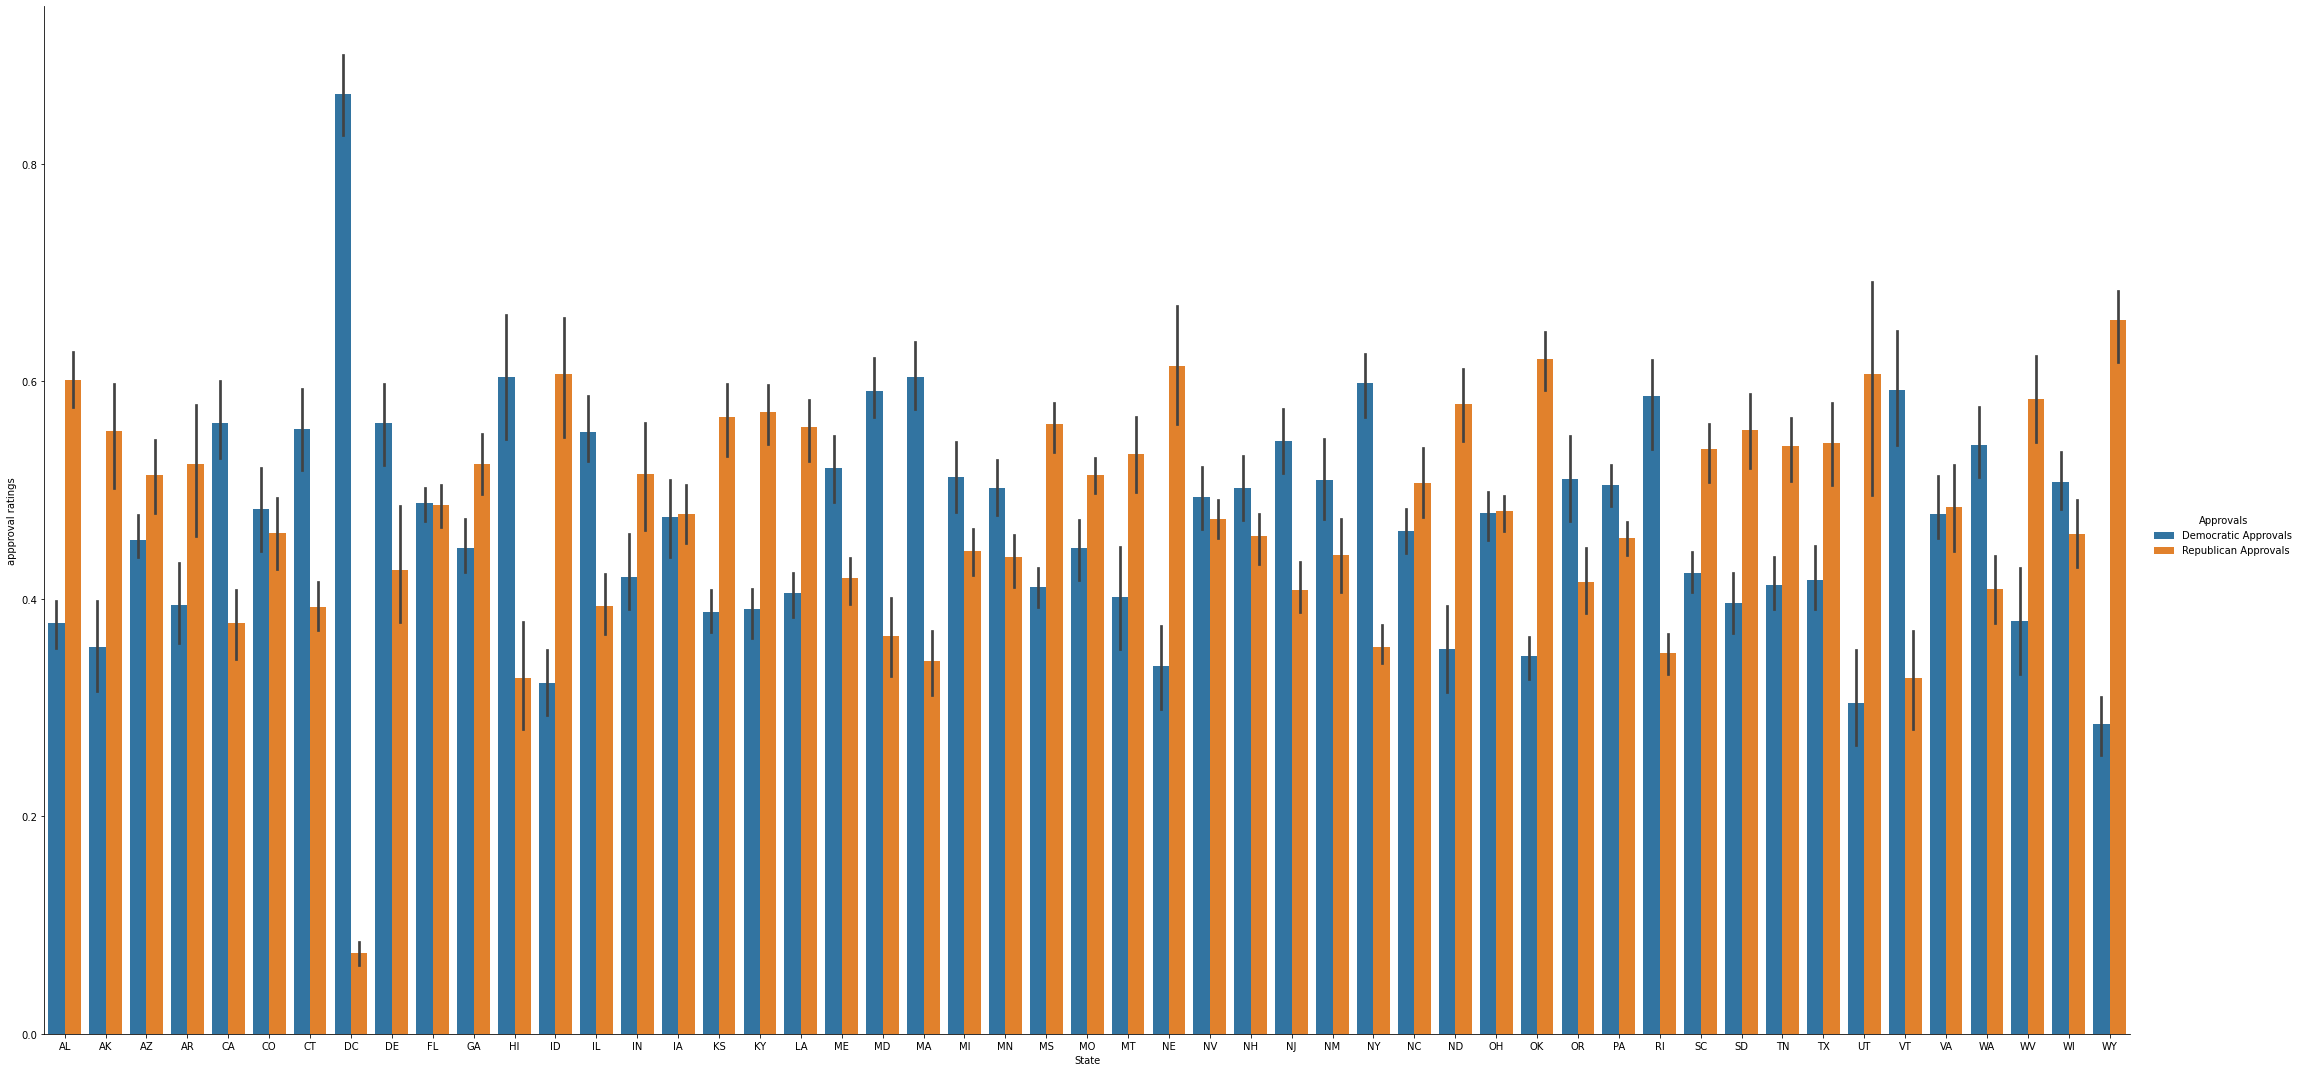

In [118]:
## Number of States won by republicans Year wise

df_dd = df[['state','democratic_approval_ratings','republican_approval_ratings']]
df_dd.columns = ['State','Democratic Approvals','Republican Approvals']

dfs1 = pd.melt(df_dd, id_vars = "State", var_name="Approvals", value_name='appproval ratings')

display(dfs1)  
plt.figure(figsize=(20, 16))
with sns.plotting_context(font_scale=10.5):
    b= sns.catplot(x = 'State', y='appproval ratings', 
               hue = 'Approvals',data=dfs1, kind='bar', height=15, aspect=2)

#sns.factorplot("state", "appproval ratings", col="approvals", data=dfs1, kind="bar")
plt.show()            
               
               